Prototyping with the `books_on_desk.jpg` image as input.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import numpy as np
import os
import sys
from matplotlib import pyplot as plt

In [3]:
CODE_DIR = os.environ['CODEROOT']
for lib_name in ('VisionCG', ):
    lib_path = os.path.join(CODE_DIR, lib_name)
    if lib_path not in sys.path:
        sys.path.append(lib_path)

In [4]:
from visioncg import io
from visioncg import improc
from visioncg import corners
from visioncg import regions

In [5]:
im_fname = 'books_on_desk.jpg'
im = io.open_image(im_fname, cv2.IMREAD_COLOR, cv2.COLOR_BGR2RGB)

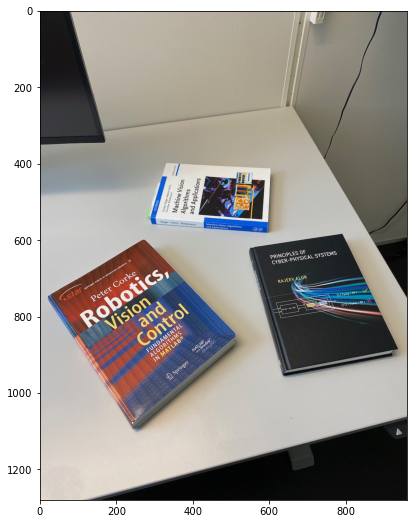

In [6]:
plt.figure(figsize=(7, 9))
plt.imshow(im)
plt.show()

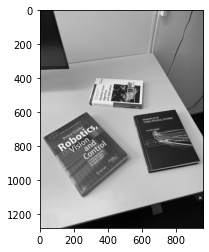

In [7]:
im_gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

plt.imshow(im_gray, cmap='gray')
plt.show()

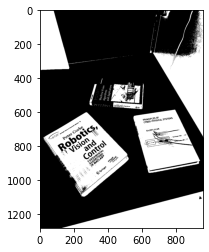

In [8]:
im_binary = regions.threshold_binary_inv(im_gray, 120)

plt.imshow(im_binary, cmap='gray')
plt.show()

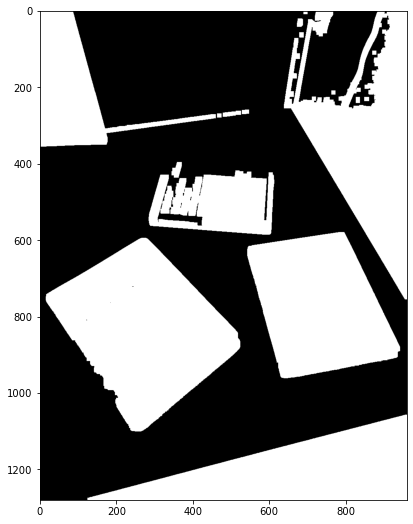

In [9]:
im_dilated = improc.dilate(im_binary, kernel_size=3, n_iter=5)

plt.figure(figsize=(7, 9))
plt.imshow(im_dilated, cmap='gray')
plt.show()

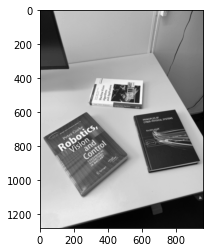

In [10]:
im_smoothed = improc.gaussian_blur(im_gray, 7)

plt.imshow(im_smoothed, cmap='gray')
plt.show()

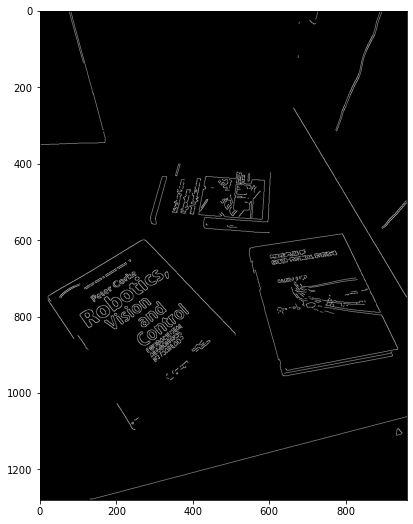

In [11]:
im_edges = cv2.Canny(im_smoothed, 150, 200)

plt.figure(figsize=(7, 9))
plt.imshow(im_edges, cmap='gray')
plt.show()

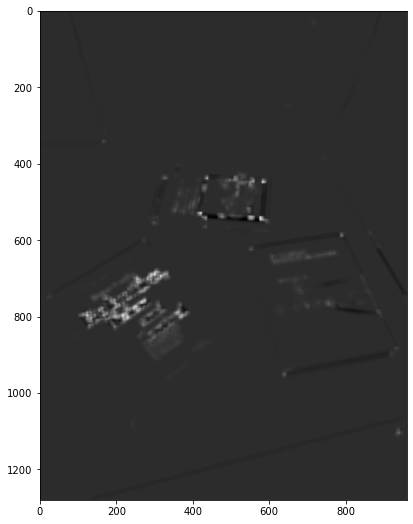

In [12]:
im_corners = corners.harris(im_smoothed, block_size=15, ksize=5, k=0.04)

plt.figure(figsize=(7, 9))
plt.imshow(im_corners, cmap='gray')
plt.show()

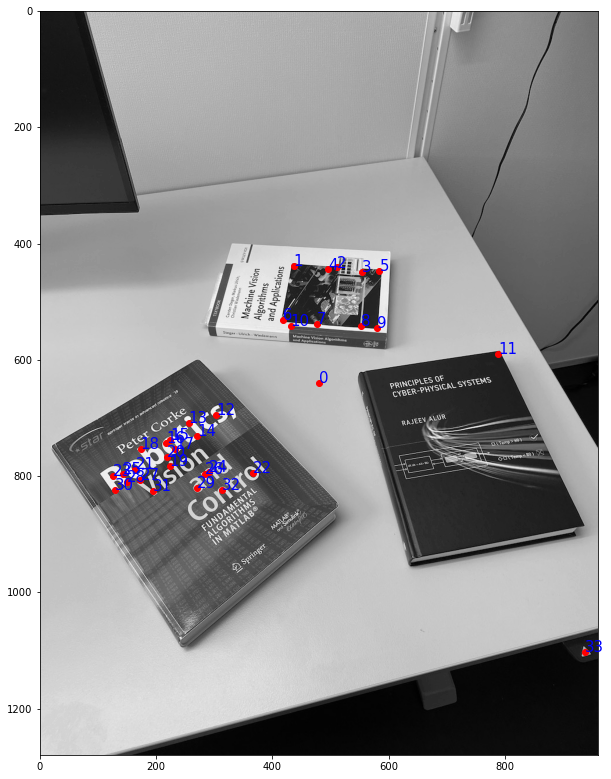

In [13]:
corner_coords = corners.harris_centroids(im_corners, 0.3)

plt.figure(figsize=(10, 15))
plt.imshow(im_gray, cmap='gray')

plt.scatter(corner_coords[:, 0], corner_coords[:, 1], color='red')

ax = plt.gca()

for i, coord in enumerate(corner_coords):
    ax.annotate(i, coord, color='blue', size=15)

plt.show()

In [14]:
indices = [6, 1, 5, 9]

four_corners = np.array(
    [corner_coords[idx] for idx in indices]
)

four_corners

array([[418.25925926, 531.03703704],
       [436.32051282, 438.57692308],
       [583.88888889, 447.66666667],
       [579.53439153, 544.4973545 ]])

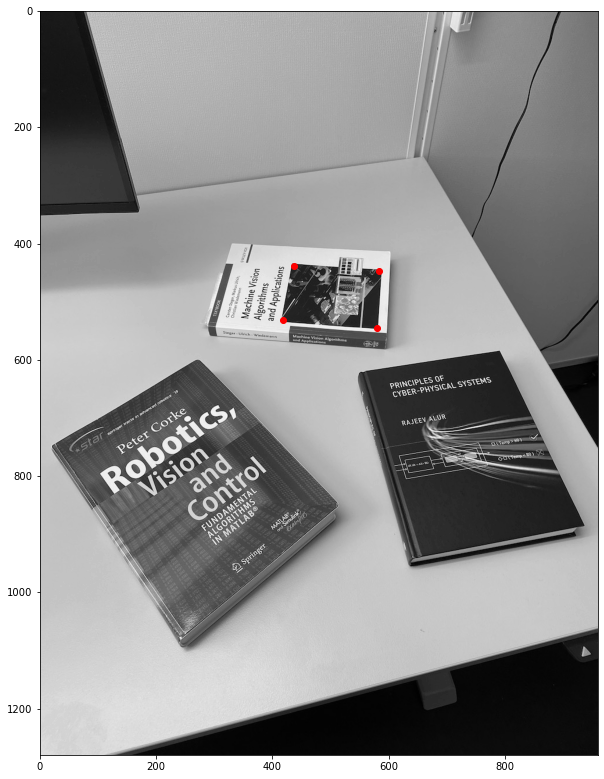

In [15]:
plt.figure(figsize=(10, 15))
plt.imshow(im_gray, cmap='gray')

plt.scatter(four_corners[:, 0], four_corners[:, 1], color='red')
plt.show()

In [16]:
x = 500
y = 500

dst_points = np.array(
    [
        [x, y],
        [x+113, y],
        [x+113, y+131],
        [x, y+131],
    ], 
    dtype=np.float32
)

dst_points

array([[500., 500.],
       [613., 500.],
       [613., 631.],
       [500., 631.]], dtype=float32)

In [17]:
M = cv2.getPerspectiveTransform(np.array(four_corners, dtype=np.float32), dst_points)

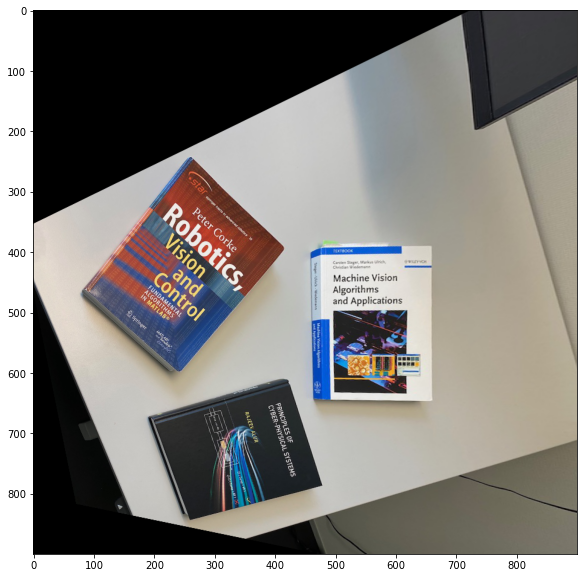

In [18]:
im_warped = cv2.warpPerspective(im, M, (900, 900), flags=cv2.INTER_LINEAR)

plt.figure(figsize=(10, 10))
plt.imshow(im_warped)
plt.show()